In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


inf = 1e9

In [3]:
def calculate_abs_diff_between_L2norms(X1, X2, should_print=False):
    error = 0
    # print(X1.shape, X2.shape)
    k = X1.shape[1]
    print
    for i in range(k):
        for j in range(i + 1, k):

            first_dist = np.linalg.norm(X1[:, i] - X1[:, j], ord=2)
            second_dist = np.linalg.norm(X2[:, i] - X2[:, j], ord=2)
            
            if should_print and i % 8 == 0 and j % 8 == 0:
                print(f'i: {j}, j: {j} \t', first_dist, second_dist)

            error += abs(first_dist - second_dist)

    return error

In [4]:
def calculate_dispersion(X):
    EX = np.mean(X, axis=1)
    EsquaredX = np.mean(X ** 2, axis=1)

    DX = EsquaredX - EX * EX
    return DX


In [16]:
# каждый столбец - это один вектор
def generate_normal_distributed_input(n, m, loc=0, scale=1):
    X = np.random.normal(loc=loc, scale=scale, size=(n, m))

    return X

In [19]:
def solve_by_lemma_djonson(X, k, tests_cnt=100, is_normal=True):
    best_error = inf
    best_solve = 0
    m = X.shape[1]
    # n = X.shape[1]
    y = []

    for _ in range(tests_cnt):
        A = 0
        if is_normal:
            A = ((1 / k) ** 0.5) * np.random.normal(loc=0, scale=1, size=(m, k))
        else:
            bound = 100
            A = ((1 / k) ** 0.5) * np.random.randint(low=(-bound), high=(bound + 1), size=(m, k))
            # A[,:] /= (disp ** 0.5)
            # disp = calculate_dispersion(A)
        print(X.shape, A.shape)
        Y = X @ A
        # print(A.shape, X.shape)
        if is_normal == False:
            disp = calculate_dispersion(Y)
            Y /= (np.mean(disp) ** 0.5)
            Y *= 3
        now_error = calculate_abs_diff_between_L2norms(X, Y)

        if now_error < best_error:
            best_error = now_error
            best_solve = Y

        if tests_cnt > 10:
            y.append(best_error)
    
    plt.plot(y, label=(f'k={k}'))
    plt.yscale('linear')
    plt.legend()
    print(best_error)
    return best_solve

In [20]:
N = 100
M = 1000
K = 100
X = generate_normal_distributed_input(N, M)
Y1 = solve_by_lemma_djonson(X, K, 100)
Y2 = solve_by_lemma_djonson(X, K, 100, False)

# calculate_abs_diff_between_L2norms(X, Y1, True)
print()
# calculate_abs_diff_between_L2norms(X, Y2, True);

(100, 1000) (1000, 100)


IndexError: index 100 is out of bounds for axis 1 with size 100

i: 8, j: 8 	 1139.6584444232603 1065.6032795672322
i: 16, j: 16 	 1130.9998961318558 1080.6370964205287
i: 24, j: 24 	 1101.856661049698 1132.268316843736
i: 16, j: 16 	 1163.3995409714153 1171.3000478333747
i: 24, j: 24 	 1119.736178742787 1121.094758544172
i: 24, j: 24 	 1133.3416201889686 1094.5337501435413


14112.552970614672

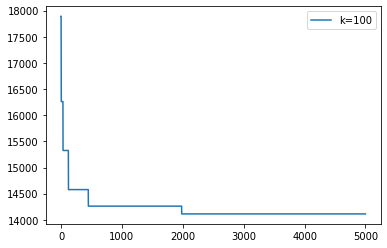

In [86]:
N = 25
M = 1000
K = 100
X = generate_normal_distributed_input(N, M, 0, 25)
Y = solve_by_lemma_djonson(X, K, 5000)

calculate_abs_diff_between_L2norms(X, Y, True)

i: 8, j: 8 	 134.47862151726153 126.268869634123
i: 16, j: 16 	 133.7392437547387 131.64697758446596
i: 16, j: 16 	 135.6991300722168 135.80865949283822


1064.703740841616

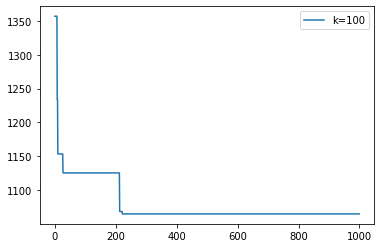

In [88]:
N = 20
M = 1000
K = 100
X = generate_normal_distributed_input(N, M, 10, 3)
Y = solve_by_lemma_djonson(X, K, 1000)

calculate_abs_diff_between_L2norms(X, Y, True)

In [196]:
from sklearn.decomposition import PCA, KernelPCA

N = 100
M = 1000
K = 100
X = generate_normal_distributed_input(N, M, 0, 1)

Y = PCA(n_components=K, svd_solver='auto').fit_transform(X.T)
print(calculate_abs_diff_between_L2norms(X, Y, False))

Y = KernelPCA(n_components=K).fit_transform(X.T)
print(calculate_abs_diff_between_L2norms(X, Y, False))


21559.892085897496
21559.892085897478
6731.004052384746


In [200]:
from sklearn.manifold import MDS

Y = MDS(n_components=K, metric=True).fit_transform(X.T)
print(calculate_abs_diff_between_L2norms(X, Y, False))

Y = MDS(n_components=K, metric=False).fit_transform(X.T)
print(calculate_abs_diff_between_L2norms(X, Y, False))

6224.273456210453
217651.06073979175


In [202]:
from sklearn.manifold import Isomap

Y = Isomap(n_components=K).fit_transform(X.T)
print(calculate_abs_diff_between_L2norms(X, Y, False))

ValueError: There are significant negative eigenvalues (0.38712 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.